# FINAL PROJECT 2 :   
**" Logistic Regression dan SVM "**

Nama Anggota Kelompok :
- MUHAMAD ADITYA DARMAWAN (PYTN-KS18-01)
- AUDITA BELLA INTAN PUSPITA (PYTN-KS18-05)
- IVANKA STELLA AUDRIA (PYTN-KS18-08)

# Pendahuluan

## Latar Belakang

Cuaca yaitu salah satu faktor alam yang paling berpengaruh dalam kehidupan. berbagai kegiatan dan aktivitas manusia akan bergantung pada cuaca pada hari itu. Untuk itu diperlukan perkiraan cuaca atau prediksi cuaca untuk mengetahui cuaca pada hari itu agar manusia dapa menjalankan aktivitasnya. Adapun faktor-faktor yang dapat mempengaruhi cuaca diantaranya adalah suhu, kelembaban, tekanan udara, kecepatan angin, dan lain sebagainya. Salah satu fenomena penting bagi kehidupan yang dipengaruhi oleh cuaca adalah hujan. Berdasarkan permasalahan itu, perlu dilakukansebuah analisis dengan suatu model yang bisa digunakan untuk  memprediksi terjadinya hujan agar masyarakat dapat menjalankan aktivitas dengan lebih baik.

## Dataset
Dataset yang digunakan pada analisis ini yaitu Rain in Australia yang diunduh dari kaggle melalui [link berikut](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

Dataset ini berisi observasi harian perkiraan hujan di seluruh daerah Australia selama 10 tahun. Dataset ini terdiri dari 23 atribut dan 145460 baris. Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (Terjadi hujan besok 1mm atau lebih).

## Objective

Objective yang ingin dicapai dalam analisis ini, yaitu:

- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia.
- Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia.
- Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts.

#Import Library

In [76]:
# Library for Preprocessing

import pandas as pd
import numpy as np

# Library for Visualization

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Library for Encoding Categorical Data

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Library for Splitting Data

from sklearn.model_selection import train_test_split, cross_val_score

# Library for Building Model

from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Library for Evaluating Model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Library for Ignore Warnings

import warnings
warnings.filterwarnings('ignore')


#Data Loading

### Import Dataset

In [77]:
# Load dataset weatherAUS.csv sebagai dataframe

df = pd.read_csv("weatherAUS.csv")

In [78]:
# Menampilkan value data teratas dari dataframe

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [79]:
# Menampilkan data terbawah

df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [80]:
# Melihat Jumlah Baris dan Kolom

df.shape

(145460, 23)

### Type of Data

In [81]:
# Menampilkan informasi dari value column dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### View Data Statistical

In [82]:
# Menampilkan Deskripsi dari Dataframe yang telah dilakukan loading

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [83]:
# Melihat Informasi lebih detail mengenai struktur DataFrame kolom kategorikal (objek)

df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### Calculate Unique Values

In [84]:
# Menghitung nilai unique pada data

df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

### Check Missing Values

In [85]:
# Checking Missing Value

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Banyak mengandung missing value

In [86]:
#   Melihat Persentasi Missing Value
for col in df.columns:
    count_null = df[col].isnull().sum()
    total = len(df[col])
    presentase = (count_null/total)*100

    print(f'Kolom {col}')
    print(f'Jumlah null {count_null}')
    print(f'Presentase null : {presentase:.2f}%\n')

Kolom Date
Jumlah null 0
Presentase null : 0.00%

Kolom Location
Jumlah null 0
Presentase null : 0.00%

Kolom MinTemp
Jumlah null 1485
Presentase null : 1.02%

Kolom MaxTemp
Jumlah null 1261
Presentase null : 0.87%

Kolom Rainfall
Jumlah null 3261
Presentase null : 2.24%

Kolom Evaporation
Jumlah null 62790
Presentase null : 43.17%

Kolom Sunshine
Jumlah null 69835
Presentase null : 48.01%

Kolom WindGustDir
Jumlah null 10326
Presentase null : 7.10%

Kolom WindGustSpeed
Jumlah null 10263
Presentase null : 7.06%

Kolom WindDir9am
Jumlah null 10566
Presentase null : 7.26%

Kolom WindDir3pm
Jumlah null 4228
Presentase null : 2.91%

Kolom WindSpeed9am
Jumlah null 1767
Presentase null : 1.21%

Kolom WindSpeed3pm
Jumlah null 3062
Presentase null : 2.11%

Kolom Humidity9am
Jumlah null 2654
Presentase null : 1.82%

Kolom Humidity3pm
Jumlah null 4507
Presentase null : 3.10%

Kolom Pressure9am
Jumlah null 15065
Presentase null : 10.36%

Kolom Pressure3pm
Jumlah null 15028
Presentase null : 10.33

### Check Data Duplikasi

In [87]:
# Cek duplikasi data
df.duplicated().sum()

0

Tidak mengandung data terduplikasi

# Data Cleaning

### Handling Missing Values

In [88]:
# Mengcopy dataframe untuk dilakukan cleaning

df_clean = df.copy()

In [89]:
# Menampilkan baris teratas

df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Hapus missing value yang presentasinya diatas 20%
Penghapusan kolom yang memiliki missing value diatas 20 persen dilakukan karena akan mengganggu pada mode. Adapun kolom yang dihapus sebagai berikut:
1. Sunshine dengan perentasi missing value 48.01%
2. Evaporation dengan presentasi missing value 43.17%
3. Cloud9am dengan presentase missing value 38.17%
4. Cloud3pm dengan presentase missing value 40.81%

In [90]:
# Menghapus missing value yang lebih dari 20%

df_clean.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [91]:
# Cek informasi column pada dataframe

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [92]:
# Cek kembali kolom yang mempunyai missing value

df_clean.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [93]:
# Mengisi missing value dengan nilai mean

float_cols = df_clean.select_dtypes(include = ['float']).columns
cat_var = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in float_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
for col in cat_var:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [94]:
df_clean.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [95]:
# Drop missing value pada target

df_clean = df_clean[df_clean['RainTomorrow'].notna()]
df_clean.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

Terjadi perubahan yang size awalnya 25,5 MB menjadi 21,7 MB

# Data Exploration

Explorasi dilakukan dengan mencari variable x yang memiliki korelasi terhadap variable target 'RainTomorrow'

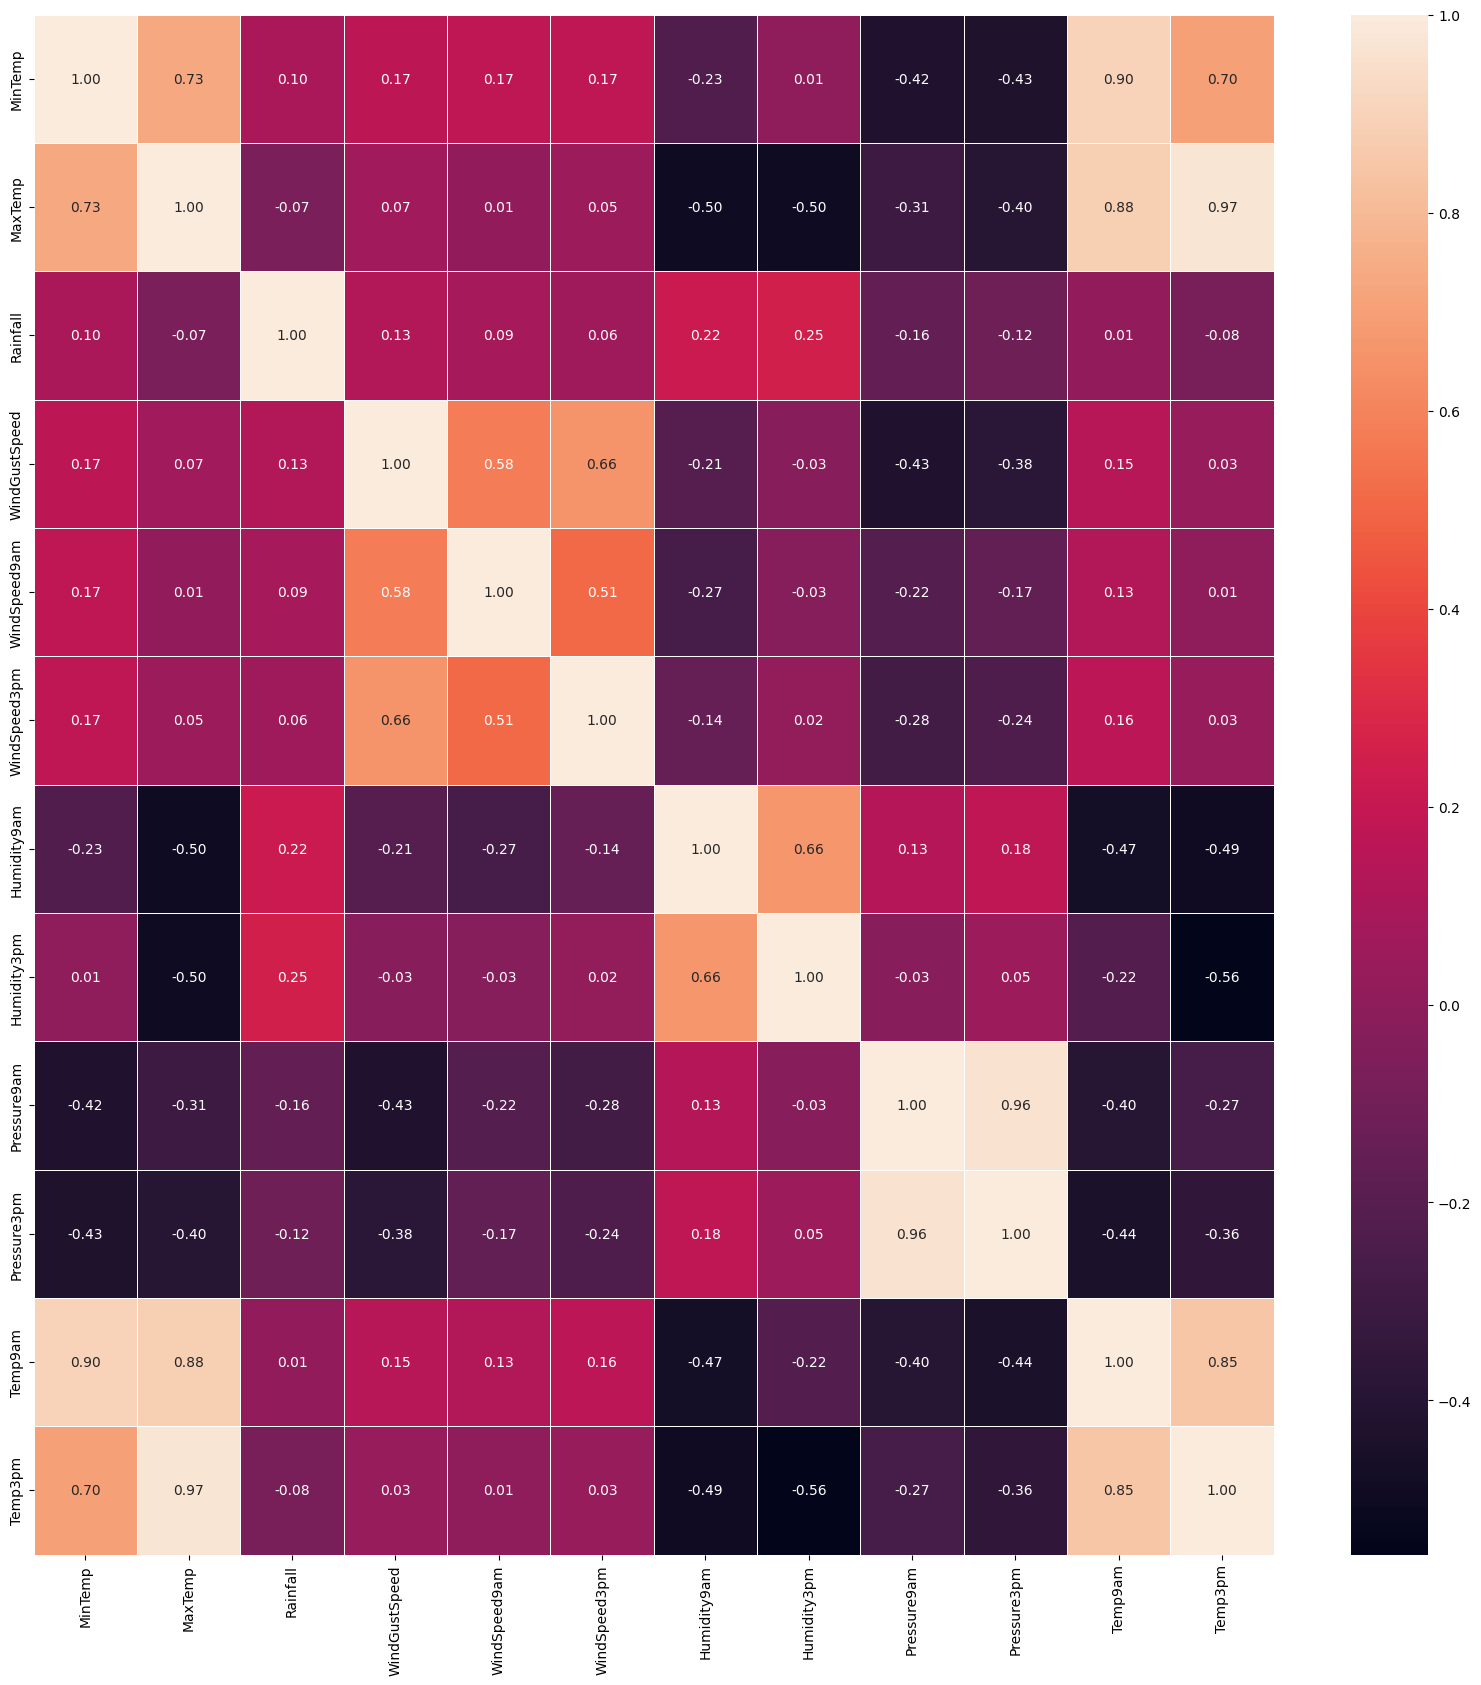

In [97]:
# Cek kembali matrix yang berkorelasi

# Memilih hanya kolom numerik

df_clean_num = df_clean.select_dtypes(include=['int64', 'float64'])

# Membuat hitmap

fig,ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df_clean_num.corr(), linewidths= .5, annot=True, fmt='.2f')

In [98]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Analisa Rain Tomorrow

In [99]:
# Analisa Rain Tomorrow sebagai Target

rain_tomorrow_type = df_clean['RainTomorrow'].value_counts(normalize=True)
rain_tomorrow_type

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

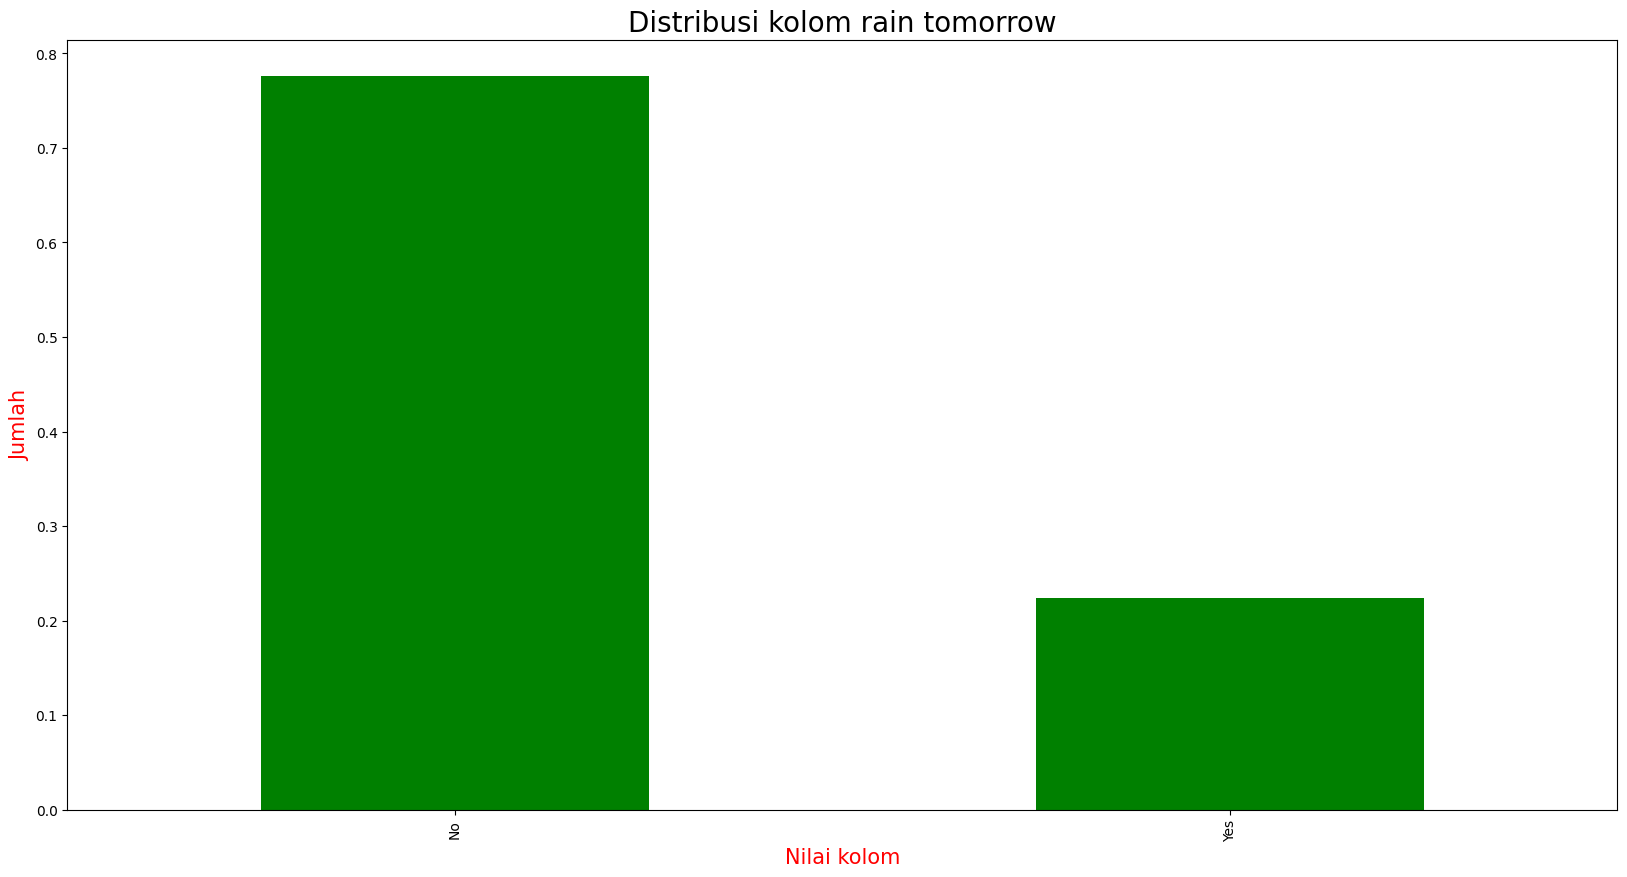

In [100]:
# Pemodelan bentuk bar

rain_tomorrow_type.plot(kind = 'bar',
                    figsize=(20,10),
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Distribusi kolom rain tomorrow', fontsize = 20)
# nama xlabel
plt.xlabel('Nilai kolom', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

- Pada kolom rain tomorrow terdapat 2 value yaitu yes dan no
- Yes menunjukkan besok akan hujan
- No menunjukkan besok tidak akan hujan
- Distrubusi value yes sebesar 22.4%
- Distribusi value no sebesar 77.6%

### Analisasi Pengaruh Kolom Date terhadap Rain Tomorrow

In [101]:
# Pendefinisian Korelasi

corel_date = df_clean.loc[: , ['Date', 'RainTomorrow']]
corel_date

,Date,RainTomorrow
0,2008-12-01,No
1,2008-12-02,No
2,2008-12-03,No
3,2008-12-04,No
4,2008-12-05,No
...,...,...
145454,2017-06-20,No
145455,2017-06-21,No
145456,2017-06-22,No
145457,2017-06-23,No


In [102]:
# Encode

label_encode = preprocessing.LabelEncoder()

corel_date_encode = corel_date.copy()

for col in corel_date.select_dtypes(include='O').columns:
    corel_date_encode[col] = label_encode.fit_transform(corel_date[col])

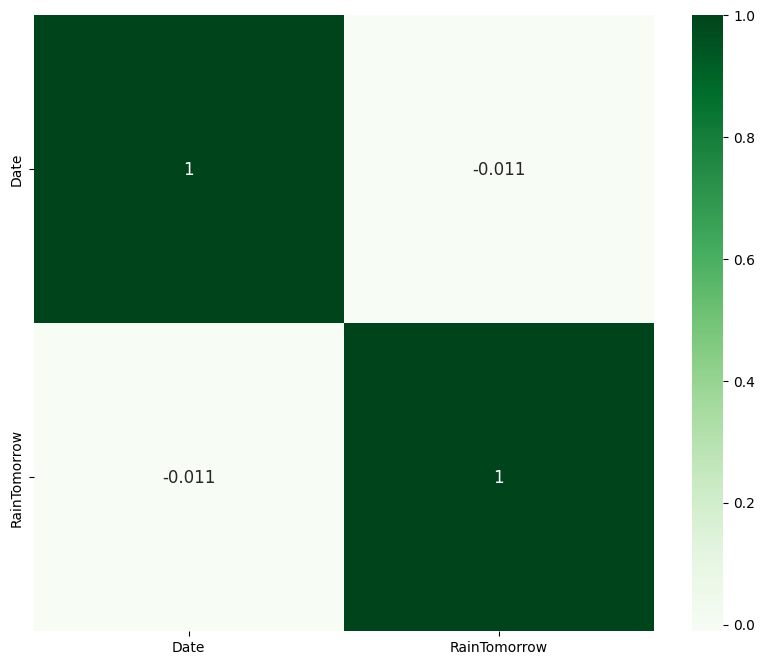

In [103]:
# Membuat heatmap korelasi data dengan rain tomorrow

corel_matriks_MM = corel_date_encode.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corel_matriks_MM, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

Pada saat pengecekan korelasi nilai, kolom date korelasinya sangat kecil sehingga tidak perlu dijadikan features.

### Pengaruh Rainfall terhadap Rain Tomorrow

In [104]:
# Encoder Rain Tomorrow

label_encoder = preprocessing.LabelEncoder()
df_clean['RainTomorrow']= label_encoder.fit_transform(df_clean['RainTomorrow'])

In [105]:
# Cek Korelasi Rainfall dengan Rin Tomorrow

korelasi_rainfall = df_clean.loc[:, [ 'Rainfall', 'RainTomorrow']]
korelasi_rainfall

,Rainfall,RainTomorrow
0,0.6,0
1,0.0,0
2,0.0,0
3,0.0,0
4,1.0,0
...,...,...
145454,0.0,0
145455,0.0,0
145456,0.0,0
145457,0.0,0


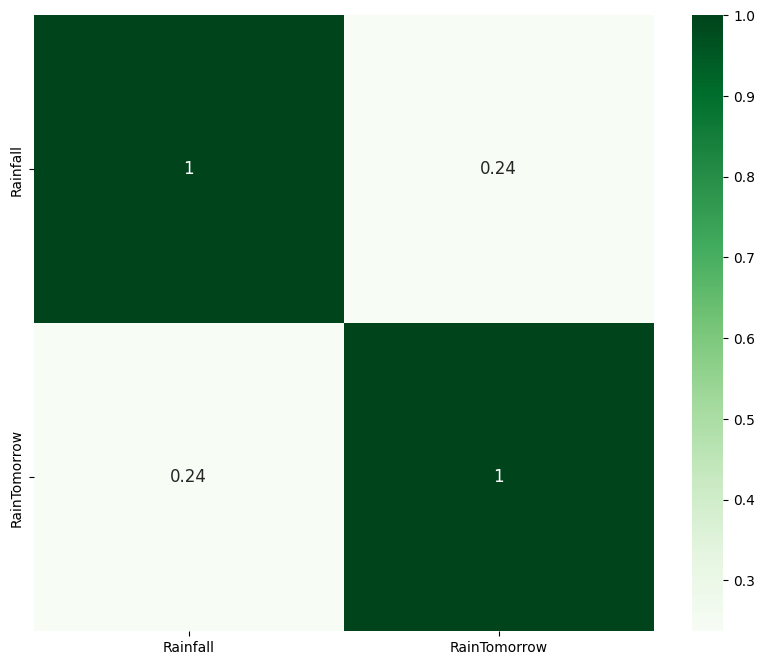

In [106]:
matriksKorelasi = korelasi_rainfall.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

Kolom Rainfall memiliki korelasi positif terhadap rain tomorrow, besar kemungkinan mempengaruhi hasil dari rain tomorrow

## Pengaruh Kolom yang mengandung kata Wind Terhadap Rain Tomorrow
Pada beberapa kolom mengandung unsur wind mulai dari kecepatan angin, arah angin, dan waktu terjadinya angin tersebut. Hal tersebut akan dikelompokkan menjadi sebuah variabel yang mengandung unsur unsur tersebut untuk di analisa.

### Mengubah data arah angin dengan busur derajat arah angin
Data WindGustDir, WindDir3pm dan WindDir9am merupakan data sebuah arah angin. Data data tersebut bisa diubah menjadi sebuah derajat pada mata angin.

In [107]:
df_clean['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [108]:
df_clean['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [109]:
df_clean['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [110]:
arah_angin = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
              'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
              'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
              'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
#pada ubah data
df_clean['WindGustDir'] = df_clean['WindGustDir'].map(arah_angin)
df_clean['WindDir9am'] = df_clean['WindDir9am'].map(arah_angin)
df_clean['WindDir3pm'] = df_clean['WindDir3pm'].map(arah_angin)

## Slicing Data Unsur Wind

In [111]:
# Melihat Korelasi Wind

korelasi_wind = df_clean.loc[:, [ 'WindGustDir', 'WindGustSpeed', 'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','RainTomorrow']]
korelasi_wind

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainTomorrow
0,270.0,44.0,270.0,292.5,20.0,24.0,0
1,292.5,44.0,337.5,247.5,4.0,22.0,0
2,247.5,46.0,270.0,247.5,19.0,26.0,0
3,45.0,24.0,135.0,90.0,11.0,9.0,0
4,270.0,41.0,67.5,315.0,7.0,20.0,0
...,...,...,...,...,...,...,...
145454,90.0,31.0,112.5,90.0,15.0,13.0,0
145455,90.0,31.0,135.0,67.5,13.0,11.0,0
145456,337.5,22.0,135.0,0.0,13.0,9.0,0
145457,0.0,37.0,135.0,292.5,9.0,9.0,0


### Tabel Korelasi wind dengan rain tomorrow

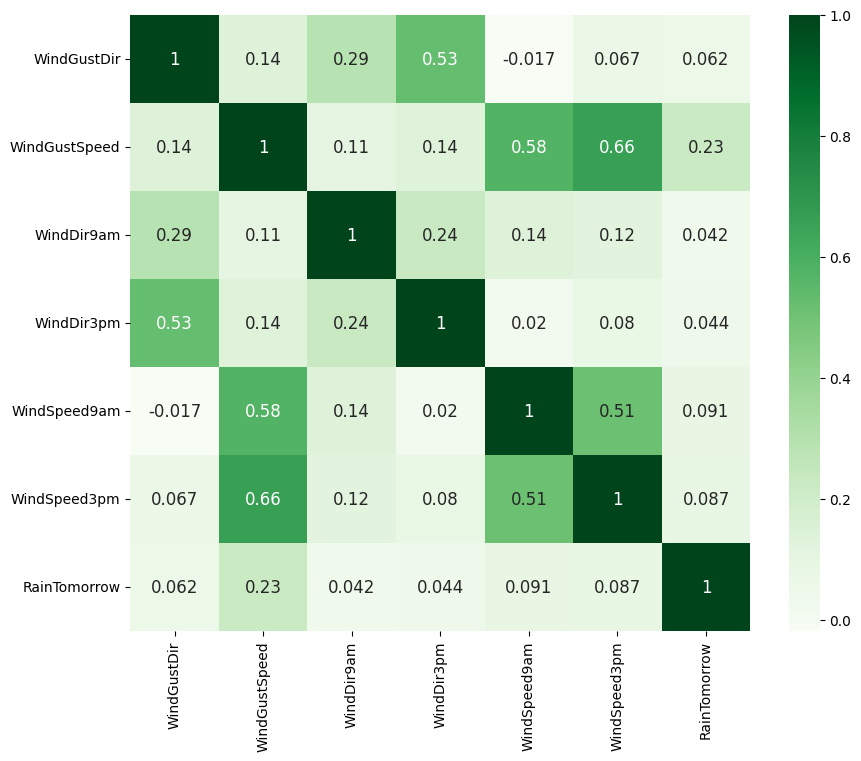

In [112]:
# Memodelkan korelasi menggunakan heatmap

matriksKorelasi = korelasi_wind.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

### Kesimpulan Kolom yang mengandung kata Wind dengan Rain Tomorrow
- Kolom yang mengandung unsur wind berjumlah 6 kolom
- Kolom WindGustDir, WindDir9am, dan WindDir3pm adalah kolom mengenai Arah angin
- Kolom WindGustSpeed, WindSpeed9am, dan WindSpeed3pm adalah kolom mengenai kecepatan angin
- Korelasi paling tinggi terhadap rain tomorrow adalah kolom WindGustSpeed. jadi wind gust speed sudah cukup mewakili kolom dengan unsur angin yang lain
- Wind GustDir memiliki korelasi yang rendsah sehingga tidak digunakan sebagai feature

- Kami menyimpulkan kolom wind gust speed sudah cukup untuk mewakili kolom kolom lain


## Pengaruh 'MinTemp', 'MaxTemp', 'Temp9am', dan 'Temp3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'MinTemp', 'MaxTemp', 'Temp9am', dan 'Temp3pm' mempengaruhi kolom 'RainTomorrow'
Kami menggabungkan beberapa kolom yang mengandung unsur temp karena berkaitan dengan suhu

### Rata rata 'MinTemp', 'MaxTemp', Temp9am, dan Temo3pm terhadap Rain Tomorrow

In [113]:
# Melakukan Grouping Rata Rata

df_clean.groupby("RainTomorrow")[["MinTemp","MaxTemp", "Temp9am", "Temp3pm"]].mean()

,MinTemp,MaxTemp,Temp9am,Temp3pm
RainTomorrow,,,,
0,11.898916,23.834758,17.076527,22.389965
1,13.181440,21.122727,16.679534,19.254986


### Scatter Plot 'Temp9am' dan 'Temp3pm' terhadap Rain Tomorrow

Text(0.5, 1.0, 'Hubungan Temp 3pm dan 9am dengan RainTomorrow')

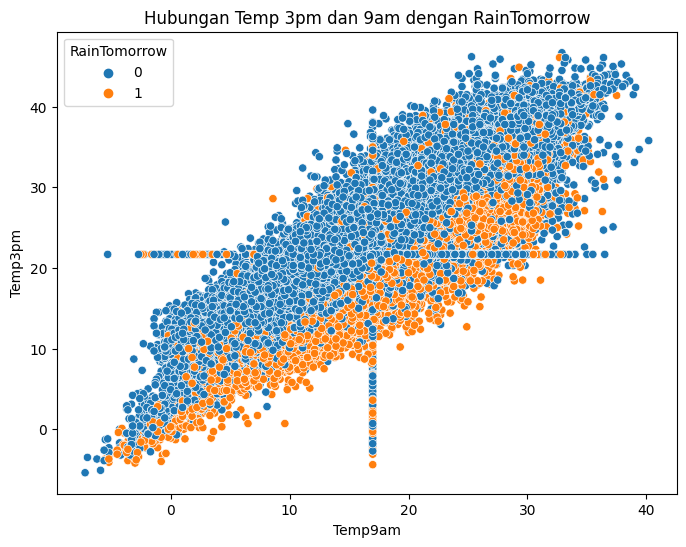

In [114]:
# Membuat Diagram Scatter Plot Temp 3pm dan 9am dengan RainTomorrow

plt.figure(figsize=(8,6))
sns.scatterplot(x="Temp9am", y="Temp3pm", hue = "RainTomorrow", data=df_clean)
plt.title("Hubungan Temp 3pm dan 9am dengan RainTomorrow")

### Scatter Plot 'MinTemp' dan 'MaxTemp' terhadap Rain Tomorrow

Text(0.5, 1.0, 'Hubungan MinMaxTemperature dengan RainTomorrow')

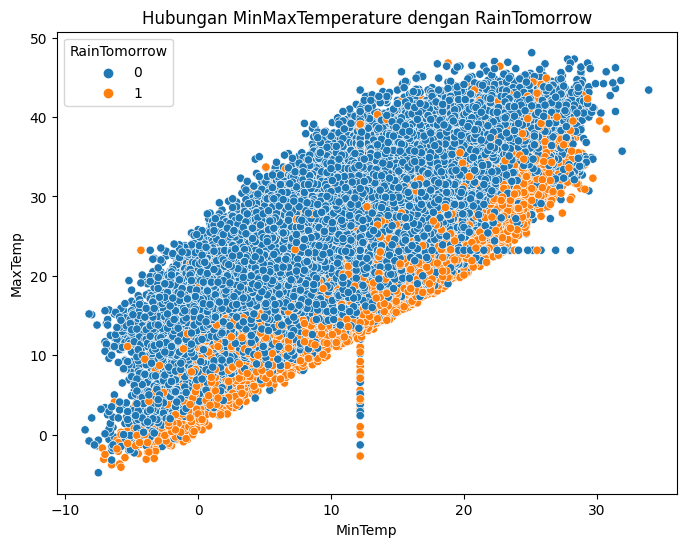

In [115]:
# Membuat Scatter plot untuk MinMax Temperature dengan Rain Tomorrow

plt.figure(figsize=(8,6))
sns.scatterplot(x="MinTemp", y="MaxTemp", hue = "RainTomorrow", data=df_clean)
plt.title("Hubungan MinMaxTemperature dengan RainTomorrow")

### Heat map MinTemp, MaxTemp, Temp9am, Temp3pm dan RainTomorrow


In [116]:
# Memodelkan korelasi

korelasi_MinMaxTemp = df_clean.loc[:, [ 'MinTemp', 'MaxTemp', "Temp9am", "Temp3pm", 'RainTomorrow']]
korelasi_MinMaxTemp

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,16.9,21.8,0
1,7.4,25.1,17.2,24.3,0
2,12.9,25.7,21.0,23.2,0
3,9.2,28.0,18.1,26.5,0
4,17.5,32.3,17.8,29.7,0
...,...,...,...,...,...
145454,3.5,21.8,9.4,20.9,0
145455,2.8,23.4,10.1,22.4,0
145456,3.6,25.3,10.9,24.5,0
145457,5.4,26.9,12.5,26.1,0


In [117]:
# Encode
label_encode = preprocessing.LabelEncoder()

# Menyalin data pada variabel cuaca_encode
korelasiMinMaxTemp_encode = korelasi_MinMaxTemp.copy()

for col in korelasi_MinMaxTemp.select_dtypes(include='O').columns:
    korelasiMinMaxTemp_encode[col]=label_encode.fit_transform(korelasi_MinMaxTemp[col])

In [118]:
korelasiMinMaxTemp_encode

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,16.9,21.8,0
1,7.4,25.1,17.2,24.3,0
2,12.9,25.7,21.0,23.2,0
3,9.2,28.0,18.1,26.5,0
4,17.5,32.3,17.8,29.7,0
...,...,...,...,...,...
145454,3.5,21.8,9.4,20.9,0
145455,2.8,23.4,10.1,22.4,0
145456,3.6,25.3,10.9,24.5,0
145457,5.4,26.9,12.5,26.1,0


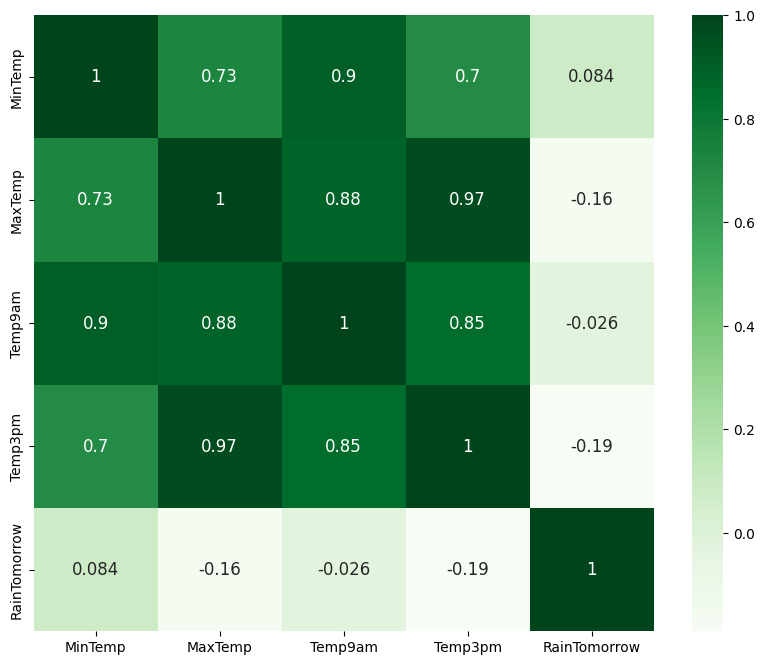

In [119]:
# Menampilkan Heatmap untuk matriks korelasi

matriksKorelasi = korelasiMinMaxTemp_encode.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

### Kesimpulan korelasi MinTemp MaxTemp dan RainTomorrow
- MinTemp adalah kolom berisikan temperature terendah hari itu
- MaxTemp adalah temperature tertinggi pada hari itu
- Pada heatmap didapatkan bahwa korelasi MinTemp dan RainTomorrow berkorelasi positif
- Pada heatmap korelasi MaxTemp dan RainTomorrow berkorelasi negatif
- Pada heatmap didapatkan korelasi yang lemah terhadap rain romorrow

Kami simpulkan bahwa kolom kolom temp9am, dan temp3pm tidak mempengaruhi hujan pada esok hari jadi tidak dijadikan sebagai feature. Sedangkan pada kolom MinTemp dan Max Temp sudah mewakili kolom temp9am dan 3pm sehingga yang digunakan sebagai feature adalah MinTemp dan MaxTemp

## Pengaruh Location Terhadap RainTomorrow
Dilakukan analisa apakah kolom Location' apakah mempengaruhi kolom 'RainTomorrow'

In [120]:
# Menampilkan Unique Value pada kolom location
df_clean['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [121]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_location = df_clean.groupby('Location').size()
sum_location

Location
Adelaide            3090
Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville      

In [122]:
# Hitung jumlah kejadian "RainTomorrow" yang sama dengan "Yes" untuk setiap lokasi

df_rain_tomorrow_yes = df.loc[df['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].count().reset_index(name='Yes')
df_rain_tomorrow_yes = df_rain_tomorrow_yes.sort_values(by='Yes', ascending=False)


 Top 5 YES 
        Location   Yes
33      Portland  1095
8         Cairns   950
43       Walpole   949
12      Dartmoor   922
22  MountGambier   920


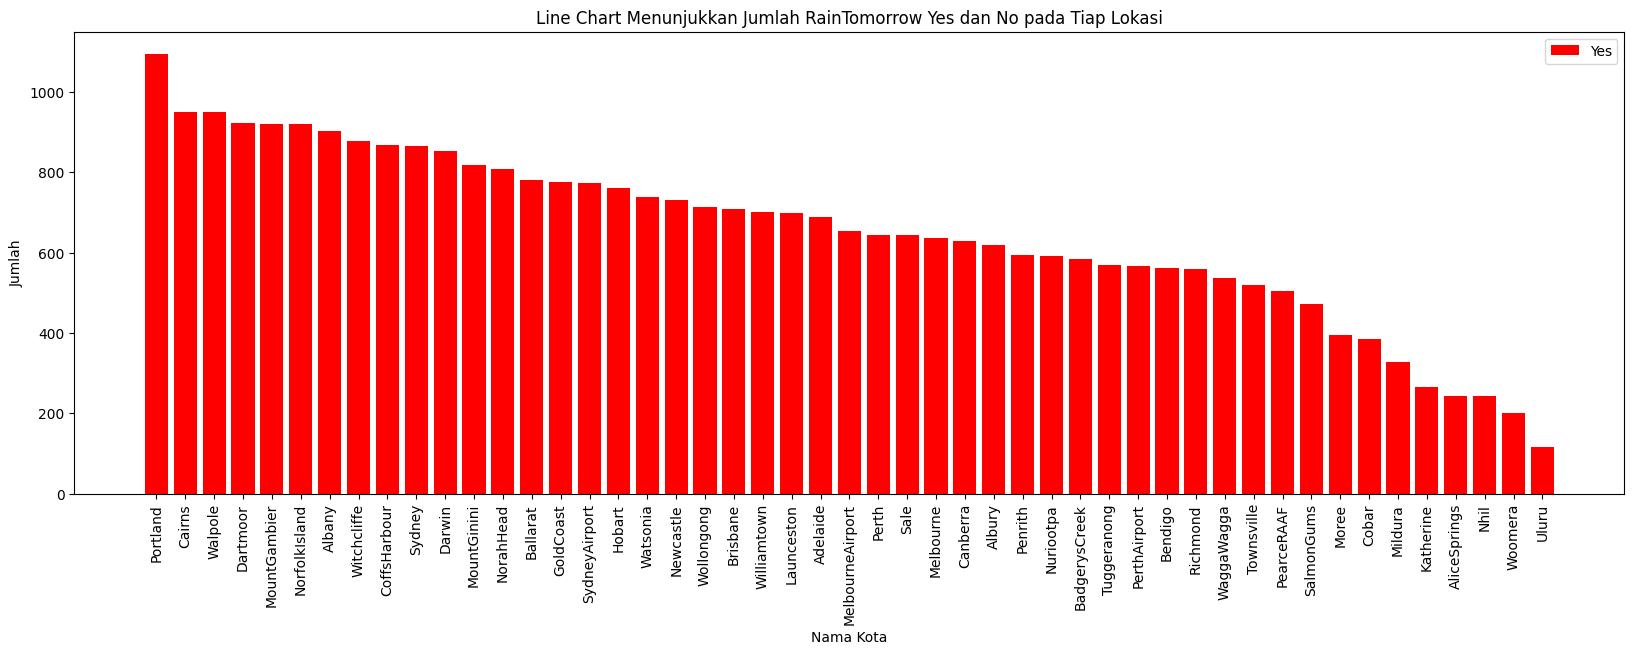

In [123]:
# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

print(" Top 5 YES ")
print(df_rain_tomorrow_yes.head())
plt.show()

**Kesimpulan Location dan RainTomorrow**  

Pada kolom location berisikan data kota kota pada australia. Data kota tersebut berisikan nama kota yang berhubungan dengan kolom RainTomorrow. Dalam nama kota tersebut didapatkan bahwa terjadinya hujan pada setiap kota berbeda beda. Jadi kami simpulkan Location menjadi feature pada model yang akan dibuat karena location mempengaruhi pada raintomorrow

## Pengaruh 'Humidity9am' dan 'Humidity3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'Humidity9am' dan 'Humidity3pm' mempengaruhi kolom 'RainTomorrow'. Kolom tersebut kami pilih karena sama sama mengandung unsur humidity, Akan tetapi jamnya saja yang berbeda

In [124]:
# Cek Korelasi Humidity

korelasi_humidity = df_clean.loc[:, [ 'Humidity9am', 'Humidity3pm', 'RainTomorrow']]
korelasi_humidity

,Humidity9am,Humidity3pm,RainTomorrow
0,71.0,22.0,0
1,44.0,25.0,0
2,38.0,30.0,0
3,45.0,16.0,0
4,82.0,33.0,0
...,...,...,...
145454,59.0,27.0,0
145455,51.0,24.0,0
145456,56.0,21.0,0
145457,53.0,24.0,0


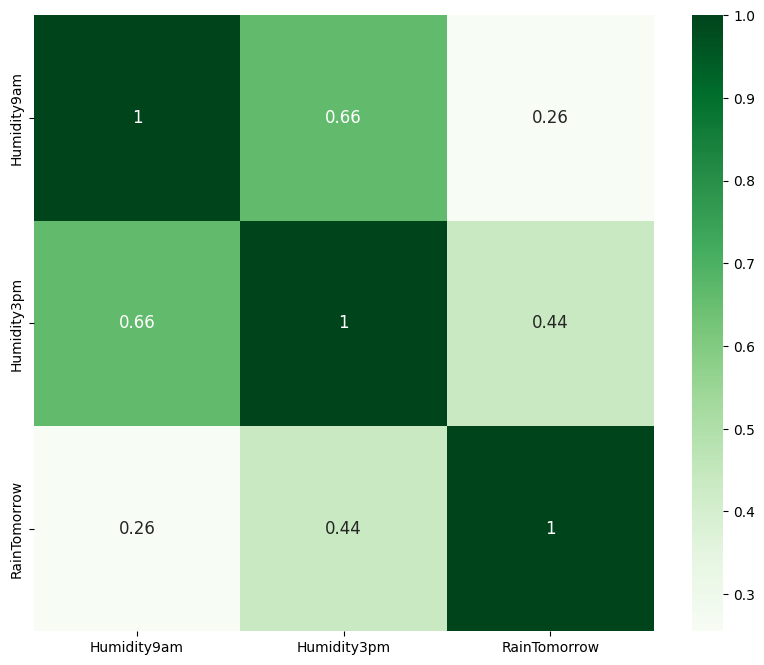

In [125]:
# Melihat korelasi dengan heatmap

matriksKorelasi = korelasi_humidity.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

**Kesimpulan Humidity3pm, humidity9am dan RainTomorrow**  
Pada kolom Humidity pukul 9 dan pukul 3 menunjukkan korelasi positif, akan tetapi pada kolom kolom lain yang mengandung unsur jam 9 dan 3 kebanyakan korelasinya tidak akurat sehingga tidak diambil sebagai feature.

## Pengaruh 'Pressure9am' dan 'Pressure3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'Pressure9am' dan 'Pressure3pm' mempengaruhi kolom 'RainTomorrow'

In [126]:
# Melihat korelasi kolom yang mengandung Pressure

korelasi_pressure = df_clean.loc[:, [ 'Pressure9am', 'Pressure3pm', 'RainTomorrow']]
korelasi_pressure

,Pressure9am,Pressure3pm,RainTomorrow
0,1007.7,1007.1,0
1,1010.6,1007.8,0
2,1007.6,1008.7,0
3,1017.6,1012.8,0
4,1010.8,1006.0,0
...,...,...,...
145454,1024.7,1021.2,0
145455,1024.6,1020.3,0
145456,1023.5,1019.1,0
145457,1021.0,1016.8,0


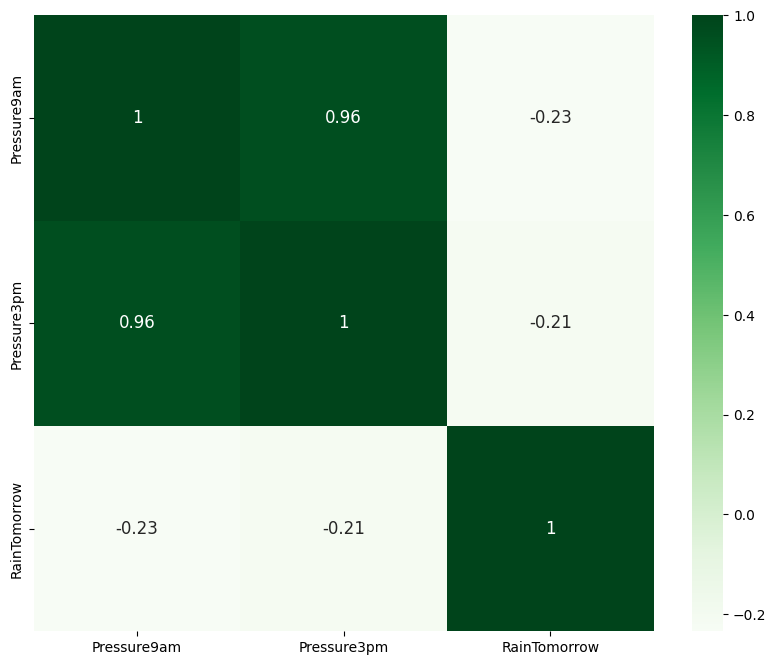

In [127]:
# Visualisasi matriks korelsi pada diagram Heatmap

matriksKorelasi = korelasi_pressure.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

**Kesimpulan Pressure dan RainTomorrow**  
Pada kolom pressure3pm dan pressure 9am didapatkan sebuah kesimpulan bahwa mereka memiliki korelasi yang rendah terhadap prediksi rain tomorrow, jadi kami menyimpulkan tidak menjadikan pressure 9am dan pressure3pm sebagai feature krn koerlasinya negatif

## Pengaruh RainToday terhadap RainTomorrow

In [128]:
# Pendefinisian rain today

rain_today_type = df_clean['RainToday'].value_counts(normalize=True)
rain_today_type

No     0.778787
Yes    0.221213
Name: RainToday, dtype: float64

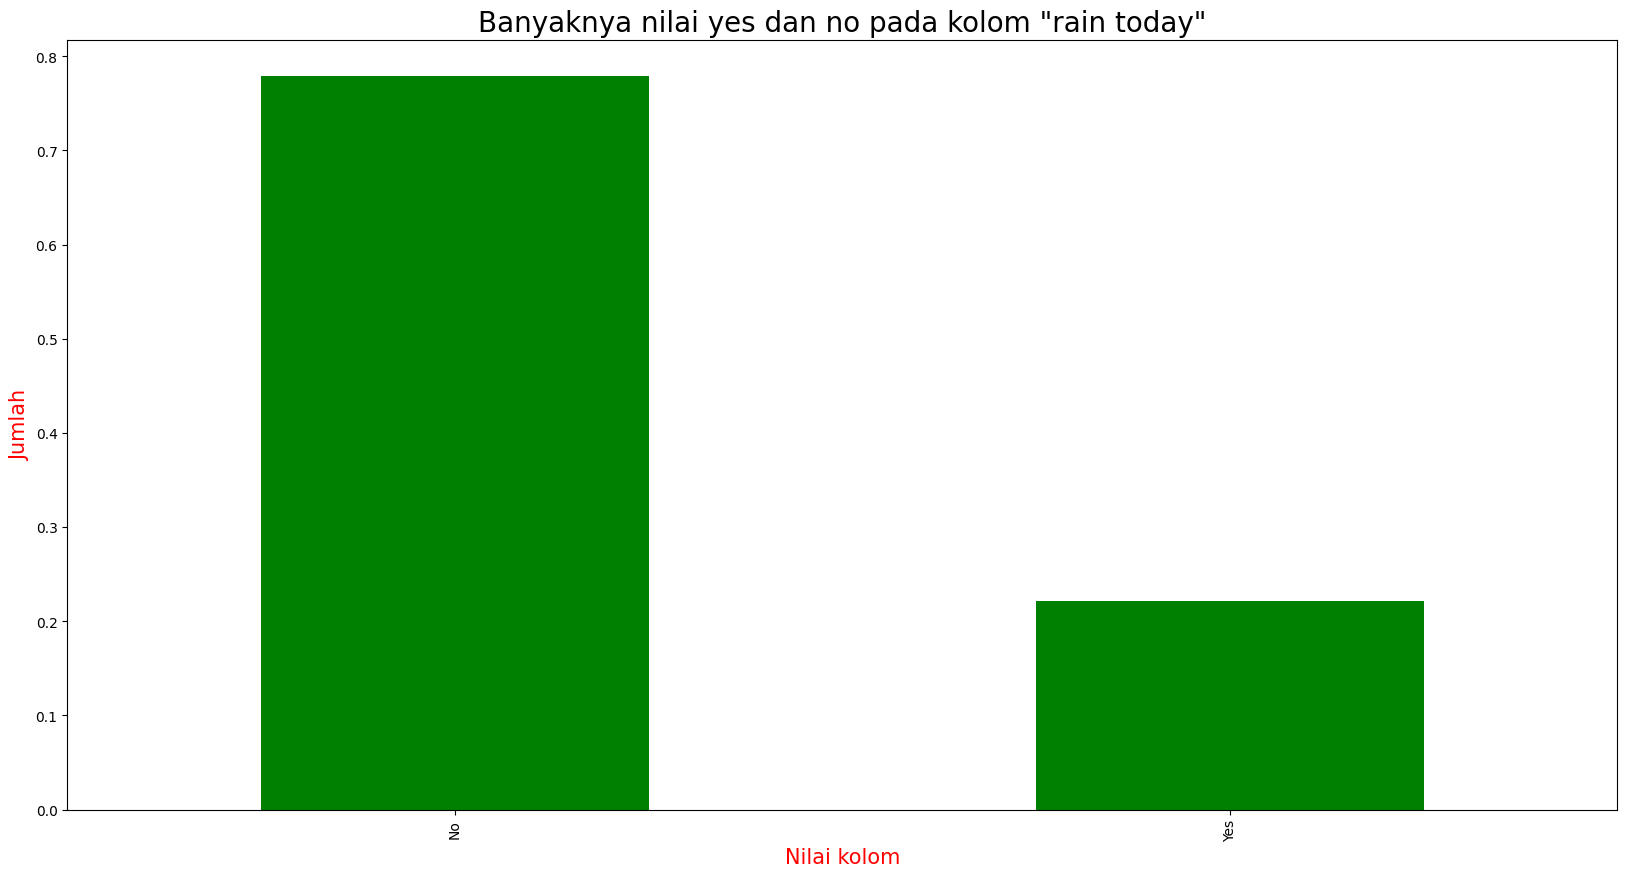

In [129]:
# inisiasi bentuk bar
rain_today_type.plot(kind = 'bar',
                    figsize=(20,10),
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Banyaknya nilai yes dan no pada kolom "rain today"', fontsize = 20)
# nama xlabel
plt.xlabel('Nilai kolom', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

**Keterangan**
- Pada kolom rain today berisikan data yes dan no. yes mewakili hujan dan no tidak
- Presentase hujan sebesar 77.8%
- Presentase jumlah tidak hujan sebesar 22.2%
- Jika dibandingkan dengan presentase kolom rain tomorrow sebagai berikut :
    - Kolom rain tomorrow bernilai no berjumlah 77.6%
    - Kolom rain tomorrow bernilai yes berjumlah 22.4%
- Jumlah presentase rain tomorrow dan rain today sangatlah mirip jadi menurut kami data tersebut berkorelasi

# **Kesimpulan EDA**
Kolom kolom yang digunakan sebagai feature sebagai berikut :
- Rainfall
- Location
- WindGustSpeed
- MinTemp
- MaxTemp
- Rain Today


Kolom kolom tersebut dipilih sebagaimana alasan pada keterangan tiap analisa sebelumnya

# Central of Tendency

In [130]:
# Mencari Mean

mean_gustspeed = df_clean['WindGustSpeed'].mean()

print('Mean dari kolom price', mean_gustspeed)

Mean dari kolom price 39.98761248981602


In [131]:
# Mencari Median

median_gustspeed = df_clean['WindGustSpeed'].median()

print('Median dari kolom price', median_gustspeed)

Median dari kolom price 39.0


In [132]:
# Mencari Modus
mode_gustspeed = df_clean['WindGustSpeed'].mode()

print('Mode dari kolom name', mode_gustspeed)

Mode dari kolom name 0    40.03523
Name: WindGustSpeed, dtype: float64


# Distribusi Kolom Location

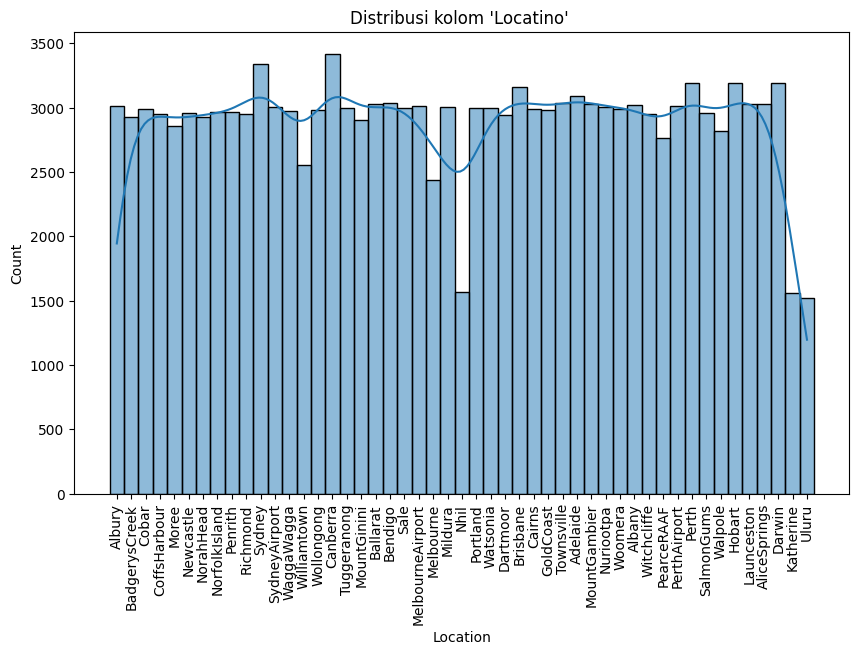

In [133]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x="Location", kde=True)
plt.title("Distribusi kolom 'Locatino' ")

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

plt.show()

# Data Preprocessing

Data preprocessing merupakan suatu proses untuk melakukan proses sebelum membuat sebuah model. Data data tersebut di proses berdasarkan explorasi data yang sebelumnya dilakukan.

In [134]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  float64
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  float64
 8   WindDir3pm     142193 non-null  float64
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

Berdasarkan eksplorasi data sebelumnya, kita telah mengidentifikasi beberapa variabel kunci yang signifikan untuk analisis, antara lain:

1. Location:
Kolom "Location" mencakup informasi lokasi kejadian.

2. Temperature (Temp):
Kolom "Temp" terdiri dari "MinTemp," "MaxTemp," "Temp9am," dan "Temp3pm." Diantara ini, "MinTemp" dan "MaxTemp" memiliki korelasi tinggi dan cukup mewakili "Temp9am" dan "Temp3pm." Oleh karena itu, kita memilih "MinTemp" dan "MaxTemp" sebagai fitur utama terkait suhu.

3. Wind:
Variabel "Wind" terdiri dari beberapa kolom yang mencakup elemen-elemen angin seperti "WindGustDir," "WindGustSpeed," "WinDir9am," "WindDir9pm," "WindSpeed9am," dan "WindSpeed3pm." Korelasi tinggi terdapat pada "WindGustSpeed," sehingga kita memilihnya sebagai fitur representatif untuk elemen angin.

4. Humidity:
Terdapat dua jenis kelembapan, yaitu "Humidity9am" dan "Humidity3pm." Meskipun keduanya memiliki korelasi yang lumayan tinggi, variabel lain seperti "WindSpeed3pm" dengan unsur jam memiliki korelasi rendah. Oleh karena itu, kita memilih hanya menggunakan "Humidity9am" dan "Humidity3pm" sebagai fitur.

5. Pressure:
Kolom "Pressure" terdiri dari dua jenis, yaitu "Pressure9am" dan "Pressure3pm." Namun, korelasi keduanya rendah sehingga tidak dijadikan sebagai fitur.

6. Rain Today:
Kolom "Rain Today" menunjukkan hasil yang mirip dengan "Rain Tomorrow" secara presentase, sehingga kita memilihnya sebagai fitur yang relevan.

Dengan demikian, fitur yang dipilih untuk analisis meliputi: "Location," "Rainfall," "WindGustSpeed," "MinTemp," "MaxTemp," dan "Rain Today."

In [135]:
data_modeling = df_clean.loc[:, ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RainToday', 'RainTomorrow']]
data_modeling

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,No,0
1,Albury,7.4,25.1,0.0,44.0,No,0
2,Albury,12.9,25.7,0.0,46.0,No,0
3,Albury,9.2,28.0,0.0,24.0,No,0
4,Albury,17.5,32.3,1.0,41.0,No,0
...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,31.0,No,0
145455,Uluru,2.8,23.4,0.0,31.0,No,0
145456,Uluru,3.6,25.3,0.0,22.0,No,0
145457,Uluru,5.4,26.9,0.0,37.0,No,0


## Encode

In [136]:
# Menentukan Kategori Variable
categoric = [var for var in data_modeling.columns if data_modeling[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categoric)))

print('The categorical variables are :', categoric)

There are 2 categorical variables

The categorical variables are : ['Location', 'RainToday']


In [137]:
# Menerapkan One Hot Encoding pada Variabel kategorik
data_modeling = pd.get_dummies(data_modeling, columns=['Location', 'RainToday'],
                            prefix=["loc", 'rain'],
                            drop_first=True)
data_modeling

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainTomorrow,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,...,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,13.4,22.9,0.6,44.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,44.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,24.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Outlier

Text(0, 0.5, 'WindGustSpeed')

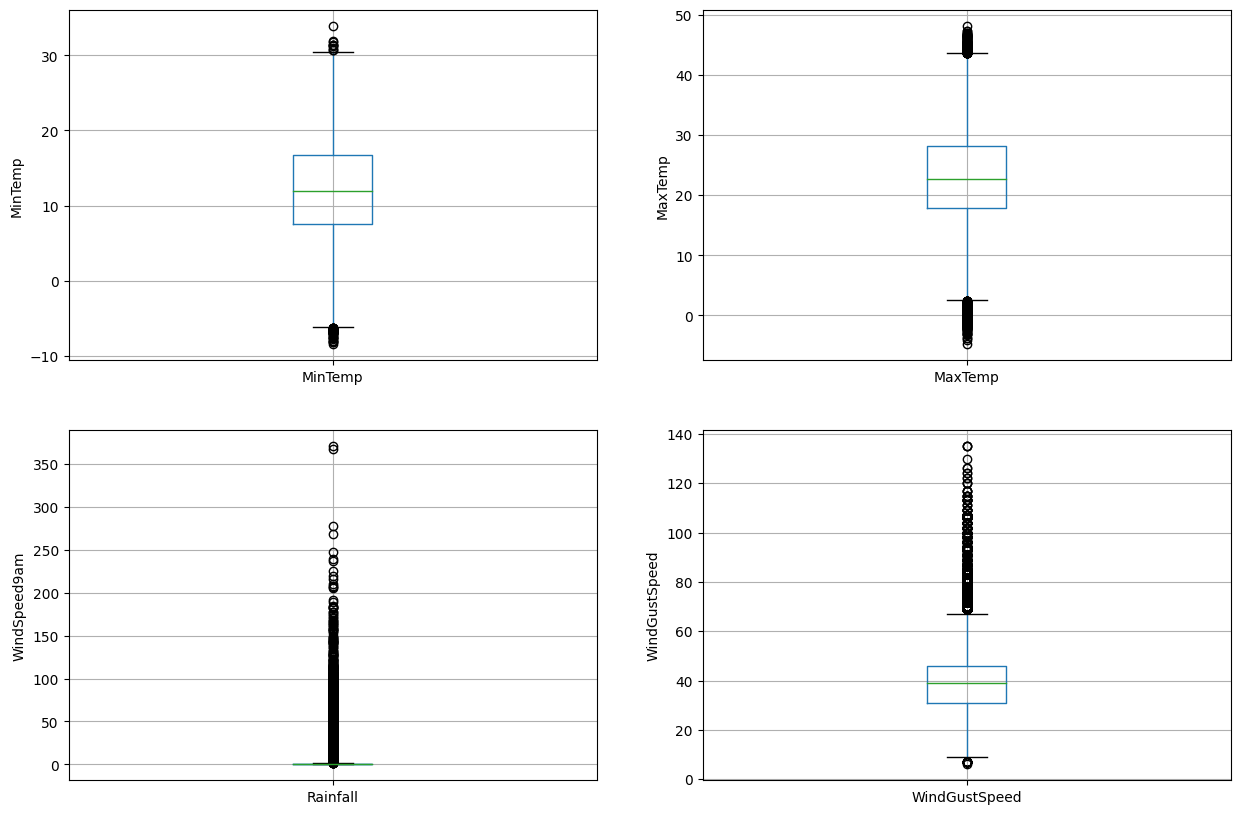

In [138]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_modeling.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 2)
fig = data_modeling.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(2, 2, 3)
fig = data_modeling.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data_modeling.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

## Outlier MinTemp

In [139]:
sorted(data_modeling['MinTemp'])

[-8.5,
 -8.2,
 -8.2,
 -8.0,
 -8.0,
 -7.8,
 -7.6,
 -7.6,
 -7.5,
 -7.5,
 -7.3,
 -7.2,
 -7.1,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -6.9,
 -6.9,
 -6.8,
 -6.8,
 -6.8,
 -6.7,
 -6.7,
 -6.7,
 -6.7,
 -6.7,
 -6.6,
 -6.6,
 -6.6,
 -6.6,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.4,
 -6.4,
 -6.4,
 -6.4,
 -6.4,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.2,
 -6.2,
 -6.2,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.7,
 -5.7,
 -5.7,
 -5.7,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.1,

In [144]:
# Membuat quantile

quantile1, quantile3= np.percentile(data_modeling['MinTemp'],[25,75])

## Menemukan IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 7.6
nilai quartile 3: 16.8
nilai iqr 9.200000000000001


In [145]:
# Menentukan batas atas dan batas bawah

lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

print(lower_bound_val,upper_bound_val)

-6.200000000000001 30.6


In [147]:
# Menghitung data yang outlier pada limit bawah

(data_modeling['MinTemp'] < lower_bound_val).sum()

52

In [150]:
# Menghitung data yang outlier pada limit atas

(data_modeling['MinTemp'] > upper_bound_val).sum()

10

In [151]:
# Dilakukan filter pada data untuk membuang data yang outlier

model_no_outlier = data_modeling[(data_modeling['MinTemp']>lower_bound_val) & (data_modeling['MinTemp'] < upper_bound_val)]

## Outlier MaxTemp

In [152]:
sorted(data_modeling['MaxTemp'])

[-4.8,
 -4.1,
 -3.8,
 -3.7,
 -3.2,
 -3.1,
 -3.1,
 -3.0,
 -2.9,
 -2.7,
 -2.5,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.2,
 -2.2,
 -2.1,
 -2.1,
 -2.1,
 -2.0,
 -2.0,
 -1.9,
 -1.9,
 -1.8,
 -1.8,
 -1.7,
 -1.7,
 -1.7,
 -1.7,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.4,
 -1.4,
 -1.4,
 -1.4,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.2,
 -1.2,
 -1.2,
 -1.2,
 -1.1,
 -1.1,
 -1.1,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.9,
 -0.9,
 -0.9,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.7,
 -0.7,
 -0.7,
 -0.7,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.5,
 -0.5,
 -0.5,
 -0.4,
 -0.4,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 

In [153]:
# Memodelkan pada quantile

quantile1, quantile3= np.percentile(data_modeling['MaxTemp'],[25,75])

# Menemukan IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 17.9
nilai quartile 3: 28.2
nilai iqr 10.3


In [156]:
# Menentukan batas bawah dan batas atas

lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

print(lower_bound_val,upper_bound_val)

2.4499999999999975 43.65


In [157]:
# Menghitung data yang outlier pada limit bawah

(data_modeling['MaxTemp'] < lower_bound_val).sum()

294

In [159]:
# Menghitung data yang outlier pada limit atas

(data_modeling['MaxTemp'] > upper_bound_val).sum()

165

In [160]:
# Dilakukan filter pada data untuk membuang data yang outlier

model_no_outlier = data_modeling[(data_modeling['MaxTemp']>lower_bound_val) & (data_modeling['MaxTemp'] < upper_bound_val)]

## Outlier Rainfall

In [161]:
sorted(data_modeling['Rainfall'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [163]:
# Membuat quantile

quantile1, quantile3= np.percentile(data_modeling['Rainfall'],[25,75])

# Menentukan quantile
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 0.0
nilai quartile 3: 0.8
nilai iqr 0.8


In [165]:
# Menemukan batas atas dan batas bawah

lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

print(lower_bound_val,upper_bound_val)

-1.2000000000000002 2.0


In [166]:
# Menghitung data yang outlier pada limit bawah

(data_modeling['Rainfall'] < lower_bound_val).sum()

0

In [167]:
# Menghitung data yang outlier pada limit atas

(data_modeling['Rainfall'] > upper_bound_val).sum()

26634

In [168]:
# Dilakukan filter pada data untuk membuang data yang outlier

model_no_outlier = data_modeling[(data_modeling['Rainfall']>lower_bound_val) & (data_modeling['Rainfall'] < upper_bound_val)]

## Outlier WindGustSpeed

In [169]:
sorted(data_modeling['WindGustSpeed'])

[6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.

In [172]:
# Menentukan Quantile

quantile1, quantile3= np.percentile(data_modeling['WindGustSpeed'],[25,75])

## Menemukan IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 31.0
nilai quartile 3: 46.0
nilai iqr 15.0


In [174]:
# Menemukan batas atas dan batas akhir

lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

print(lower_bound_val,upper_bound_val)

8.5 68.5


In [175]:
# Menghitung data yang outlier pada limit bawah

(data_modeling['WindGustSpeed'] < lower_bound_val).sum()

19

In [176]:
# Menghitung data yang outlier pada limit atas

(data_modeling['WindGustSpeed'] > upper_bound_val).sum()

5367

In [177]:
# Dilakukan filter pada data untuk membuang data yang outlier

model_no_outlier = data_modeling[(data_modeling['WindGustSpeed']>lower_bound_val) & (data_modeling['WindGustSpeed'] < upper_bound_val)]

## Setelah Outlier Handling

Text(0, 0.5, 'WindGustSpeed')

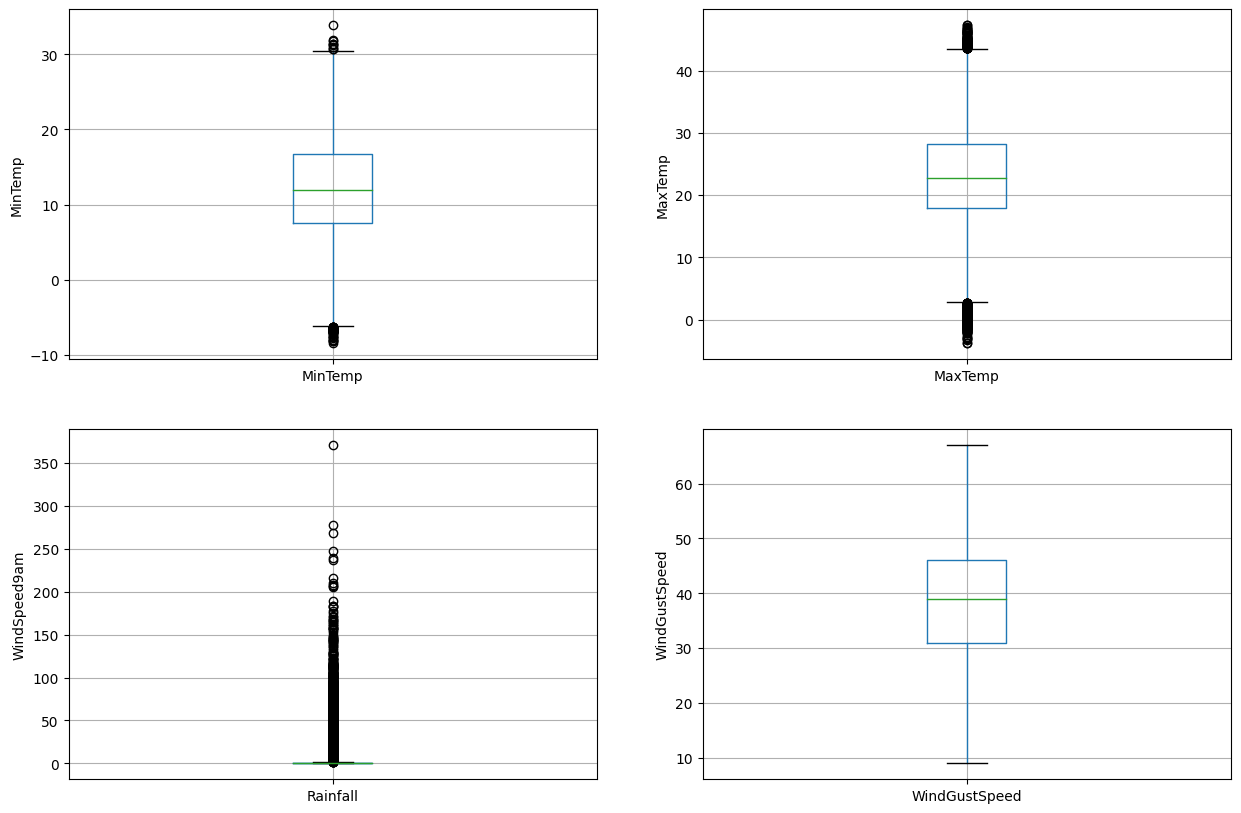

In [178]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = model_no_outlier.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 2)
fig = model_no_outlier.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')


plt.subplot(2, 2, 3)
fig = model_no_outlier.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = model_no_outlier.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

# Model Defiation

Metode pengujian yang akan digunakan pada project kali ini adalah metode Logistic Regression dengan pembanding SVM

## Logistic Regression
Metode pengujian pada training ini menggunakan metode regresi logistik. Alasan penggunaan metode karena regresi logistik dapat dipakai untuk masalah klasifikasi biner. Model akan menghitung probabilitas data masing-masing kelas kemudian membuat keputusan akhir dengan mengambil probabilitas tertinggi.

## SVM
Model kedua yakni model SVM. Model ini digunakan sebagai pembanding model regresi logistik. SVM dapat mengolah data berdimensi tinggi tanpa mengalami penurunan performa yang signifikan.

In [179]:
logistic = LogisticRegression()
svm = LinearSVC()

# Evaluasi Model

### SVM

In [181]:
x_svm = model_no_outlier.drop(['RainTomorrow',"Rainfall"], axis = 1)
y_svm = model_no_outlier['RainTomorrow']

# Training dan test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm ,y_svm, random_state=42, test_size=0.3)

In [182]:
# Training
svm.fit(x_train_svm, y_train_svm)

LinearSVC()

## Score Evaluasi SVM

In [183]:
# Membuat prediksi svm

predict_svm = svm.predict(x_test_svm)

In [185]:
# Mengukur Akurasi SVM

akurasi_svm = accuracy_score(y_test_svm, predict_svm)
print('Accuracy score Test - Model SVM: {0:0.4f}'. format(akurasi_svm))

Accuracy score Test - Model SVM: 0.7904


In [186]:
# Mencetak hasil

print(confusion_matrix(y_test_svm, predict_svm))
print(classification_report(y_test_svm, predict_svm))
print(accuracy_score(y_test_svm, predict_svm))

[[29564  2862]
 [ 5739  2878]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     32426
           1       0.50      0.33      0.40      8617

    accuracy                           0.79     41043
   macro avg       0.67      0.62      0.64     41043
weighted avg       0.77      0.79      0.77     41043

0.7904392953731453


### Cross Validation

In [188]:
# Menerapkan scoring validasi
score_cross_svm = cross_val_score(svm, x_train_svm, y_train_svm, cv = 5, scoring='accuracy')

# Menghitung score cross-validation
print('Cross-validation scores:{}'.format(score_cross_svm))

# Menghitung rata - rata score cross-validation
print('Average cross-validation score: {:.4f}'.format(score_cross_svm.mean()))

Cross-validation scores:[0.78650864 0.80462591 0.78718739 0.79167754 0.29735798]
Average cross-validation score: 0.6935


### Confusion Matrix

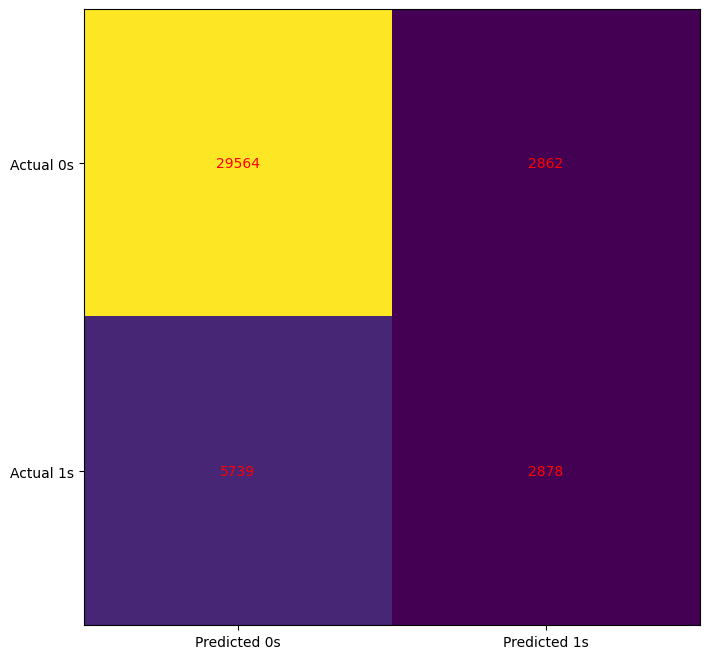

In [189]:
# Membuat diagram subplots

svm_confusion = confusion_matrix(y_test_svm, predict_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(svm_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_confusion[i, j], ha='center', va='center', color='red')
plt.show()

Confusion matrix diatas menunjukkan prediksi benar and  prediksi salah

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1)


- `True Negatives` (Actual Negative:0 and Predict Negative:0)


- `False Positives` (Actual Negative:0 but Predict Positive:1)  `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0)  `(Type II error)`

In [190]:
# Mencetak Hasil

print('Ringkasan Evaluasi Model SVM')
print('Akurasi : {0:0.4f}'. format(akurasi_svm))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_svm,predict_svm)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_svm,predict_svm)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_svm,predict_svm)))

Ringkasan Evaluasi Model SVM
Akurasi : 0.7904
Presisi : 0.5014
Recall : 0.3340
F1 Score : 0.4009


## Logistic Regression

In [193]:
x_logistic = model_no_outlier.drop(['RainTomorrow',"Rainfall"], axis = 1)
y_logistic = model_no_outlier['RainTomorrow']

# Training dan test

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_logistic ,y_logistic, random_state=42, test_size=0.3)

In [194]:
# Training

logistic.fit(x_train_log,y_train_log)

LogisticRegression()

### Hasil Score Logistic Regression

In [195]:
# Mendefinisikan prediksi logistik

predict_logistic = logistic.predict(x_test_log)

In [196]:
# Membuat akurasi prediksi logistik

accuracy_score_logistic = accuracy_score(y_test_log,predict_logistic)
print('accuracy :', accuracy_score_logistic)

accuracy : 0.8106376239553639


In [197]:
print(classification_report(y_test_log,predict_logistic))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     32426
           1       0.61      0.28      0.38      8617

    accuracy                           0.81     41043
   macro avg       0.72      0.61      0.63     41043
weighted avg       0.78      0.81      0.78     41043



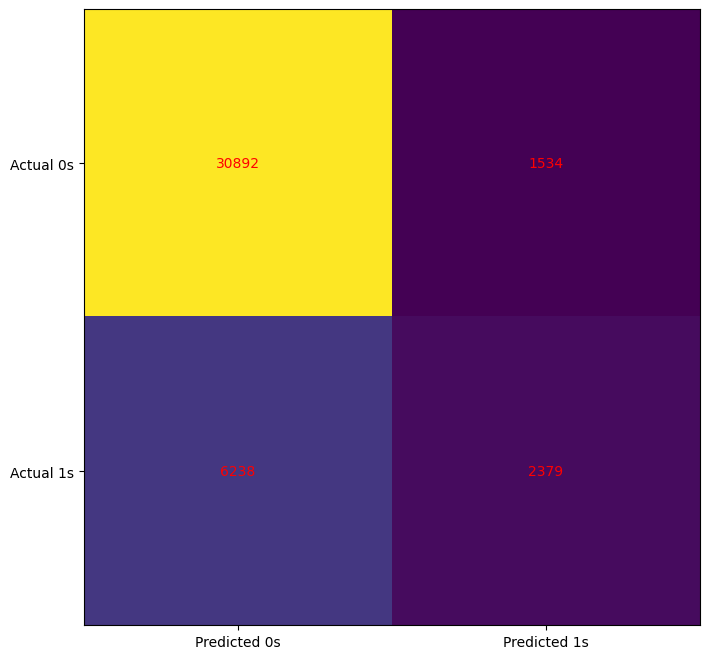

In [198]:
# Membuat diagram sublplot logistik regression

logistic_regression_confusion = confusion_matrix(y_test_log, predict_logistic)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_confusion[i, j], ha='center', va='center', color='red')
plt.show()

Confusion matrix diatas menunjukkan `prediksi benar` and ` prediksi salah`.

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1)


- `True Negatives` (Actual Negative:0 and Predict Negative:0)


- `False Positives` (Actual Negative:0 but Predict Positive:1)  `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0)  `(Type II error)`

In [104]:
print('Ringkasan Evaluasi Model Logistic Regression')
print('Akurasi : {0:0.4f}'. format(accuracy_score_logistic))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_log, predict_logistic)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_log, predict_logistic)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_log, predict_logistic)))

Ringkasan Evaluasi Model Logistic Regression
Akurasi : 0.8106
Presisi : 0.6080
Recall : 0.2761
F1 Score : 0.3797


## Perbandingan SVM dengan Logistic Regression

In [199]:
print('Ringkasan Evaluasi Model SVM')
print('Akurasi : {0:0.4f}'. format(akurasi_svm))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_svm,predict_svm)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_svm,predict_svm)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_svm,predict_svm)))

print('Ringkasan Evaluasi Model Logistic Regression')
print('Akurasi : {0:0.4f}'. format(accuracy_score_logistic))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_log, predict_logistic)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_log, predict_logistic)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_log, predict_logistic)))

Ringkasan Evaluasi Model SVM
Akurasi : 0.7904
Presisi : 0.5014
Recall : 0.3340
F1 Score : 0.4009
Ringkasan Evaluasi Model Logistic Regression
Akurasi : 0.8106
Presisi : 0.6080
Recall : 0.2761
F1 Score : 0.3797


## Hasil
Berdasarkan evaluasi model, terlihat bahwa baik model Regresi Logistik (LR) maupun model Support Vector Machine (SVM) memiliki tingkat akurasi yang hampir identik, masing-masing mencapai 81% dan 79% untuk logistic regression dan SVM. Perbedaan antara keduanya hanya sekitar 1%. Meskipun demikian, ketika menilik nilai presisi dan recall, keduanya menunjukkan keunggulan masing-masing dalam memprediksi kelas yang berbeda. SVM menonjol dengan nilai presisi yang lebih tinggi untuk kelas positif (fraud), sementara Regresi Logistik memiliki recall yang lebih tinggi untuk kelas positif.

Dalam konteks ini, performa model LR dan SVM menunjukkan keseimbangan yang baik antara data pelatihan dan pengujian, dengan perbedaan skor yang tidak signifikan. Oleh karena itu, dapat disimpulkan bahwa model tidak mengalami overfitting atau underfitting. Meskipun skor akurasi dan precision keduanya cukup tinggi (> 0.6), namun skor recall dan F1 masih tergolong rendah.

In [200]:
# Menampilkan kembali hasil SVM

x_svm.head()

,MinTemp,MaxTemp,WindGustSpeed,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,loc_Bendigo,loc_Brisbane,...,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,13.4,22.9,44.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,44.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,46.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,24.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,41.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Logistic Regression

test_logistic = {'MinTemp':[20, 18.3, 11, 13.3],
         'MaxTemp':[28, 30, 32, 21],
         'WindGustSpeed':[33, 50, 90, 20],

         'loc_Albany': [0, 0, 0, 0],
         'loc_Albury': [0, 0, 0, 0],
         'loc_AliceSprings': [0, 0, 0, 0],
         'loc_BadgerysCreek': [0, 0, 0, 0],
         'loc_Ballarat': [0, 0, 0, 0],
         'loc_Bendigo': [0, 0, 0, 0],
         'loc_Brisbane': [0, 0, 0, 0],
         'loc_Brisbane': [0, 0, 0, 0],
         'loc_Cairns': [0, 0, 0, 0],
         'loc_Canberra': [0, 0, 0, 0],
         'loc_Cobar': [0, 0, 0, 0],
         'loc_CoffsHarbour': [0, 0, 0, 0],
         'loc_Dartmoor': [0, 0, 0, 0],
         'loc_Darwin': [0, 0, 0, 0],
         'loc_GoldCoast': [0, 0, 0, 0],
         'loc_Hobart': [0, 0, 0, 0],
         'loc_Katherine': [0, 0, 0, 0],
         'loc_Launceston': [0, 0, 0, 0],
         'loc_Melbourne': [0, 0, 0, 0],
         'loc_MelbourneAirport': [0, 0, 0, 0],
         'loc_Mildura': [0, 0, 0, 0],
         'loc_Moree': [0, 0, 0, 0],
         'loc_MountGambier': [0, 0, 0, 0],
         'loc_MountGinini': [0, 0, 0, 0],
         'loc_Newcastle': [0, 0, 0, 0],
         'loc_Nhil': [0, 0, 0, 0],
         'loc_NorahHead': [0, 0, 0, 0],
         'loc_NorfolkIsland' : [0, 0, 0, 0],
         'loc_Nuriootpa'  : [0, 0, 0, 0],
         'loc_PearceRAAF'  : [0, 0, 0, 0],
         'loc_Penrith'  : [0, 0, 0, 0],
         'loc_Perth'  : [0, 0, 0, 0],
         'loc_PerthAirport'  : [0, 0, 0, 0],
         'loc_Portland'  : [0, 0, 0, 0],
         'loc_Richmond'  : [0, 0, 0, 0],
         'loc_Sale'  : [0, 0, 0, 0],
         'loc_SalmonGums'  : [0, 0, 0, 0],
         'loc_Sydney'  : [0, 0, 0, 0],
         'loc_SydneyAirport' : [0, 0, 0, 0],
         'loc_Townsville'  : [0, 0, 0, 0],
         'loc_Tuggeranong'  : [0, 0, 0, 0],
         'loc_Uluru'  : [0, 0, 0, 0],
         'loc_WaggaWagga'  : [0, 0, 0, 0],
         'loc_Walpole'  : [0, 0, 0, 0],
         'loc_Watsonia'  : [0, 0, 0, 0],
         'loc_Williamtown'  : [1, 0, 0, 0],
         'loc_Witchcliffe'  : [0, 1, 0, 0],
         'loc_Wollongong'  : [0, 0, 1, 0],
         'loc_Woomera'  : [0, 0, 0, 1],
         'rain_Yes' : [0, 1, 0, 1]
        }



test_logistic = pd.DataFrame(test_logistic)
test_logistic

,MinTemp,MaxTemp,WindGustSpeed,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,loc_Bendigo,loc_Brisbane,...,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,20.0,28,33,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,18.3,30,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,11.0,32,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.3,21,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [112]:
# Menampilkan predict logistic

predict_logistic_test = logistic.predict(test_logistic)
predict_logistic_test

array([0, 0, 0, 0])

# Kesimpulan

## Kesimpulan Model Inference Logistic Regression
Pada model inferensi, terdapat data acak yang sesuai dengan data di data_modeling. Selanjutnya, data tersebut diuji menggunakan prediksi regresi logistik, menghasilkan nilai 0 yang menunjukkan ketiadaan hujan pada hari berikutnya dalam pengujian tersebut.








## Kesimpulan SVM dan Regresi Logistik pada Data WeatherAUS
Dari rangkaian tindakan yang dilakukan pada data weatherAUS, beberapa temuan diperoleh sebagai berikut:

- Data weatherAUS mencakup berbagai jenis informasi yang memengaruhi kondisi hujan di wilayah Australia. Data ini kemudian diproses untuk menentukan fitur yang akan digunakan.
- Hasil analisis EDA menunjukkan bahwa data yang tidak memiliki korelasi tinggi diabaikan, sedangkan data yang memiliki korelasi tinggi dipilih sebagai fitur.
- Skor SVM mencapai 79%, sedangkan skor Regresi Logistik mencapai 81%.
- Perbedaan nilai skor antara SVM dan Regresi Logistik hanya 2%.
- Pengujian dengan model inferensi menghasilkan output [0, 0, 0, 0], menunjukkan ketiadaan hujan pada kedua set data tersebut.  


Berdasarkan pengujian, dapat disimpulkan bahwa hasil Regresi Logistik lebih baik 2% daripada SVM pada data weatherAUS.